In [75]:
import json

pca_projections_final_layer_qwen = None
with open("../../data/pca_projections_final_layer_qwen.json") as f:
    pca_projections_final_layer_qwen = json.load(f)

In [76]:
import numpy as np

en = np.array(pca_projections_final_layer_qwen["en"])
ru = np.array(pca_projections_final_layer_qwen["ru"])

In [77]:
print(en.shape)
print(ru.shape)

(10, 2063)
(10, 3116)


In [78]:
X = np.vstack([en.T, ru.T])
y = np.array([1] * en.shape[1] + [0] * ru.shape[1])

X = X[:, :2]

In [79]:
from sklearn.model_selection import train_test_split

X_trn, X_tst, y_trn, y_tst = train_test_split(X, y, test_size=0.4, shuffle=True, random_state=42)

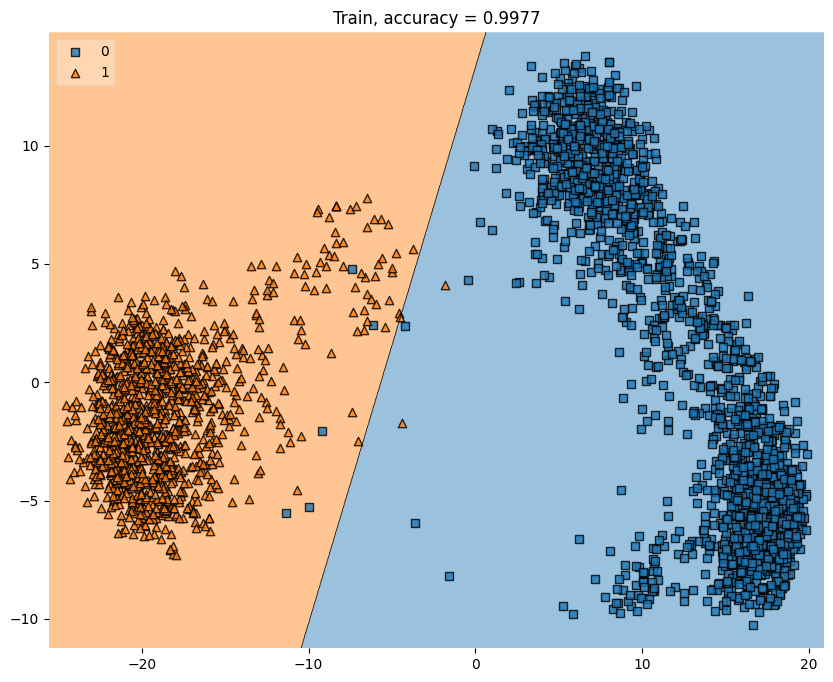

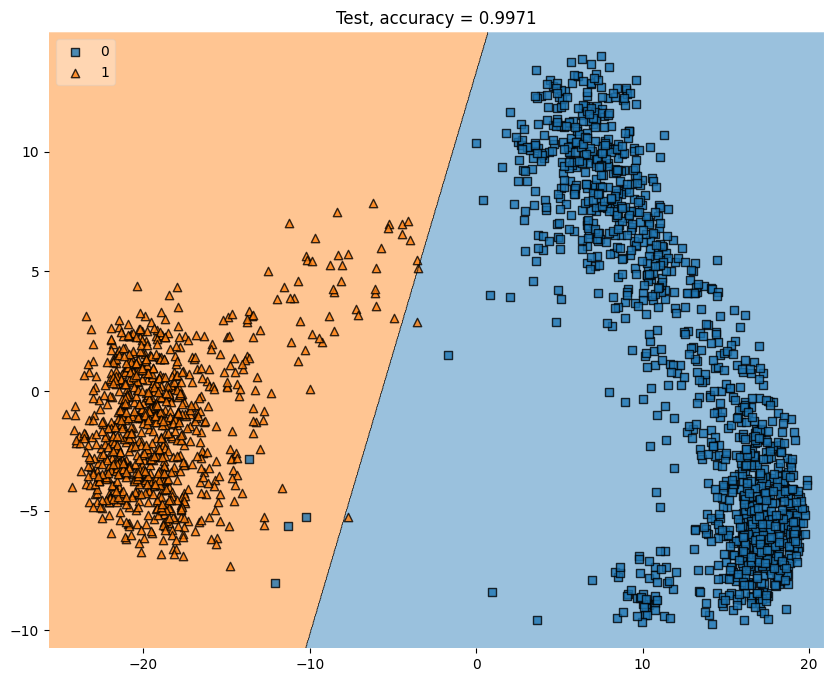

In [82]:
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_decision_regions
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression(random_state=42, penalty="l2")

classifier.fit(X_trn, y_trn)
train_accuracy = classifier.score(X_trn, y_trn)
test_accuracy = classifier.score(X_tst, y_tst)

plt.figure(figsize=(10, 8))
plot_decision_regions(
    X=X_trn,
    y=y_trn,
    clf=classifier,
    legend=2,
)
plt.title(f"Train, accuracy = {train_accuracy:.4f}")
plt.show()

plt.figure(figsize=(10, 8))
plot_decision_regions(
    X=X_tst,
    y=y_tst,
    clf=classifier,
    legend=2,
)
plt.title(f"Test, accuracy = {test_accuracy:.4f}")
plt.show()